In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Alinemm/DMIE-2020.1/master/DesafioA-cursos-prouni-pb-jpa.csv')

In [0]:
df

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,PB,Joao Pessoa,Centro Universitário de João Pessoa - Unipê - ...,CAMPUS UNIPÊ - Água Fria,Administração,Bacharelado,Matutino,529.00,5.0,4.0,NaN,NaN,609.94,607.20,NaN,NaN
1,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 01 - Miramar,Administração,Bacharelado,Curso a Distância,298.00,1.0,NaN,NaN,NaN,582.64,NaN,NaN,NaN
2,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 02 - Expedicionários,Administração,Bacharelado,Curso a Distância,298.00,NaN,NaN,1.0,NaN,NaN,NaN,547.80,NaN
3,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Administração,Bacharelado,Noturno,864.67,NaN,NaN,NaN,100.0,NaN,NaN,450.00,NaN
4,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Administração,Bacharelado,Matutino,864.67,NaN,NaN,NaN,100.0,NaN,NaN,450.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 01 - Miramar,Teologia,Bacharelado,Curso a Distância,189.00,NaN,NaN,1.0,NaN,NaN,NaN,568.88,NaN
356,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 02 - Expedicionários,Teologia,Bacharelado,Curso a Distância,189.00,1.0,NaN,1.0,1.0,631.42,NaN,604.00,529.3
357,PB,Joao Pessoa,Universidade Cruzeiro do Sul - UNICSUL,"COESP - JOÃO PESSOA, PARAÍBA - Centro",Teologia,Bacharelado,Curso a Distância,256.86,NaN,NaN,1.0,NaN,NaN,NaN,561.42,NaN
358,PB,Joao Pessoa,Faculdade Paraíbana - FAP,CAMPUS - JOÃO PESSOA - MIRAMAR - Miramar,Turismo,Bacharelado,Noturno,474.27,2.0,1.0,NaN,NaN,580.22,558.24,NaN,NaN


In [0]:
#valor média das instituições da PB
df.mensalidade.mean()

663.3612777777778

In [0]:
#valor mediana das instituições da PB
df.mensalidade.median()

492.39

In [0]:
#desvio padrao das instituições da PB
df.mensalidade.std()

757.1894344917151

In [0]:
#moda das instituições da PB
df.mensalidade.mode()

0    256.86
dtype: float64

---------

Desafio B

In [0]:
df.columns

Index(['uf_busca', 'cidade_busca', 'universidade_nome', 'campus_nome', 'nome',
       'grau', 'turno', 'mensalidade', 'bolsa_integral_cotas',
       'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla',
       'nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla',
       'nota_parcial_cotas'],
      dtype='object')

In [0]:
#A
type(df)

pandas.core.frame.DataFrame

In [0]:
#B
df.shape

(360, 16)

In [0]:
#C
df.universidade_nome.nunique()

29

In [0]:
#D
df.nome.nunique()

82

In [0]:
#E
df.universidade_nome[(df.nome=='Ciência da Computação') | (df.nome=='Ciências da Computação')].unique()

array(['Centro Universitário de João Pessoa - Unipê - UNIPÊ',
       'Instituto Paraibano de Ensino Renovado - INPER',
       'Faculdade Devry João Pessoa - DVJP',
       'Faculdade Internacional da Paraíba - FPB'], dtype=object)

In [0]:
#F
df.mensalidade[(df.nome=='Ciência da Computação') | (df.nome=='Ciências da Computação')].mean()

651.772



---

Desafio C

In [0]:
#Desafio C - Detecção de outliers
df.isna().mean()

uf_busca                0.000000
cidade_busca            0.000000
universidade_nome       0.000000
campus_nome             0.000000
nome                    0.000000
grau                    0.000000
turno                   0.000000
mensalidade             0.000000
bolsa_integral_cotas    0.177778
bolsa_integral_ampla    0.413889
bolsa_parcial_cotas     0.852778
bolsa_parcial_ampla     0.852778
nota_integral_ampla     0.177778
nota_integral_cotas     0.416667
nota_parcial_ampla      0.725000
nota_parcial_cotas      0.980556
dtype: float64

In [0]:
#Estratégia 1
print("média da mensalidade: ",df.mensalidade.mean())
print("mediana da mensalidade: ",df.mensalidade.median())

print("\nmédia da nota_integral_ampla: ",df.nota_integral_ampla.mean())
print("mediana da nota_integral_ampla: ",df.nota_integral_ampla.median())

print("\nmédia da nota_integral_cotas: ",df.nota_integral_cotas.mean())
print("mediana da nota_integral_cotas: ",df.nota_integral_cotas.median())

média da mensalidade:  663.3612777777778
mediana da mensalidade:  492.39

média da nota_integral_ampla:  593.8917567567569
mediana da nota_integral_ampla:  591.51

média da nota_integral_cotas:  583.7900952380957
mediana da nota_integral_cotas:  579.78


In [0]:
#Estratégia 2
print("desvio padrão da mensalidade: ",df.mensalidade.std())
print("\ndesvio padrão da nota_integral_ampla: ",df.nota_integral_ampla.std())
print("\ndesvio padrão da nota_integral_cotas: ",df.nota_integral_cotas.std())

desvio padrão da mensalidade:  757.1894344917151

desvio padrão da nota_integral_ampla:  39.80384881681868

desvio padrão da nota_integral_cotas:  38.52677856993148


In [0]:
#Estratégia 3
from scipy import stats
import numpy as np

df['zscore_mensalidade'] = np.abs(stats.zscore(df.mensalidade))
df['zscore_nota_integral_ampla'] = np.abs(stats.zscore(df.nota_integral_ampla))
df['zscore_nota_integral_cotas'] = np.abs(stats.zscore(df.nota_integral_cotas))

In [0]:
df.zscore_mensalidade[(df.zscore_mensalidade> 3) | (df.zscore_mensalidade <-3)].count()

3

In [0]:
df.zscore_nota_integral_ampla[(df.zscore_nota_integral_ampla> 3) | (df.zscore_nota_integral_ampla <-3)].count()

0

In [0]:
df.zscore_nota_integral_cotas[(df.zscore_nota_integral_cotas> 3) | (df.zscore_nota_integral_cotas <-3)].count()

0

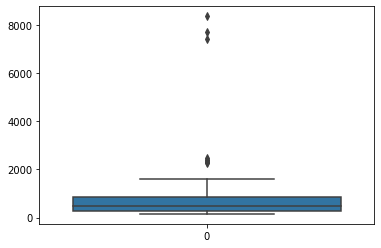

In [0]:
#Estratégia 4 - Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df.mensalidade)

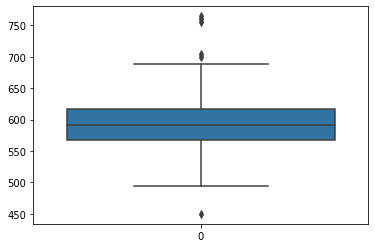

In [0]:
sns.boxplot(data=df.nota_integral_ampla)

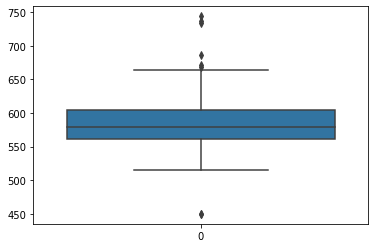

In [0]:
sns.boxplot(data=df.nota_integral_cotas)

Tratando os outliers

In [0]:
#Estratégia 1
df_semOutliers1 = df[(df.zscore_mensalidade<3) & (df.zscore_mensalidade> -3)]

In [0]:
#Estratégia 2
df_semOutliers2 =  df
df_semOutliers2.mensalidade = np.where((df_semOutliers2.zscore_mensalidade>3) | (df_semOutliers2.zscore_mensalidade<-3), 
                                       df_semOutliers2.mensalidade.mean(), 
                                       df_semOutliers2.mensalidade)


In [0]:
#Estratégia 3
df_semOutliers3 = df
df_semOutliers3 = df_semOutliers3[df_semOutliers3.mensalidade.between(df.mensalidade.quantile(.25), df.mensalidade.quantile(.75))]
print(df_semOutliers3.shape)
print(max(df_semOutliers3.mensalidade))

(183, 19)
839.79


In [0]:
print(df.shape)
print(max(df.mensalidade))


(360, 19)
2488.0




---



Desafio D

In [0]:
#Detecção de valores nulos
df.isnull().sum() 

uf_busca                        0
cidade_busca                    0
universidade_nome               0
campus_nome                     0
nome                            0
grau                            0
turno                           0
mensalidade                     0
bolsa_integral_cotas           64
bolsa_integral_ampla          149
bolsa_parcial_cotas           307
bolsa_parcial_ampla           307
nota_integral_ampla            64
nota_integral_cotas           150
nota_parcial_ampla            261
nota_parcial_cotas            353
zscore_mensalidade              0
zscore_nota_integral_ampla    360
zscore_nota_integral_cotas    360
dtype: int64

In [0]:
df.isna().sum() 

uf_busca                        0
cidade_busca                    0
universidade_nome               0
campus_nome                     0
nome                            0
grau                            0
turno                           0
mensalidade                     0
bolsa_integral_cotas           64
bolsa_integral_ampla          149
bolsa_parcial_cotas           307
bolsa_parcial_ampla           307
nota_integral_ampla            64
nota_integral_cotas           150
nota_parcial_ampla            261
nota_parcial_cotas            353
zscore_mensalidade              0
zscore_nota_integral_ampla    360
zscore_nota_integral_cotas    360
dtype: int64

In [0]:
#Estratégia 2 - removendo os nulos
 df_semNulos = df.dropna()
 df_semNulos.isna().sum() 

uf_busca                      0
cidade_busca                  0
universidade_nome             0
campus_nome                   0
nome                          0
grau                          0
turno                         0
mensalidade                   0
bolsa_integral_cotas          0
bolsa_integral_ampla          0
bolsa_parcial_cotas           0
bolsa_parcial_ampla           0
nota_integral_ampla           0
nota_integral_cotas           0
nota_parcial_ampla            0
nota_parcial_cotas            0
zscore_mensalidade            0
zscore_nota_integral_ampla    0
zscore_nota_integral_cotas    0
dtype: int64

In [0]:
#Estratégia 2 - trocando por um valor default
df_Tratado = df
df_Tratado.bolsa_integral_cotas = df_Tratado.bolsa_integral_cotas.fillna(0)

In [0]:
df_Tratado.isna().sum()

uf_busca                        0
cidade_busca                    0
universidade_nome               0
campus_nome                     0
nome                            0
grau                            0
turno                           0
mensalidade                     0
bolsa_integral_cotas            0
bolsa_integral_ampla          149
bolsa_parcial_cotas           307
bolsa_parcial_ampla           307
nota_integral_ampla            64
nota_integral_cotas           150
nota_parcial_ampla            261
nota_parcial_cotas            353
zscore_mensalidade              0
zscore_nota_integral_ampla    360
zscore_nota_integral_cotas    360
dtype: int64



---




Desafio E

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 19 columns):
uf_busca                      360 non-null object
cidade_busca                  360 non-null object
universidade_nome             360 non-null object
campus_nome                   360 non-null object
nome                          360 non-null object
grau                          360 non-null object
turno                         360 non-null object
mensalidade                   360 non-null float64
bolsa_integral_cotas          360 non-null float64
bolsa_integral_ampla          211 non-null float64
bolsa_parcial_cotas           53 non-null float64
bolsa_parcial_ampla           53 non-null float64
nota_integral_ampla           296 non-null float64
nota_integral_cotas           210 non-null float64
nota_parcial_ampla            99 non-null float64
nota_parcial_cotas            7 non-null float64
zscore_mensalidade            360 non-null float64
zscore_nota_integral_ampla    0 non-null

In [0]:
df.head()

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,zscore_mensalidade,zscore_nota_integral_ampla,zscore_nota_integral_cotas
0,PB,Joao Pessoa,Centro Universitário de João Pessoa - Unipê - ...,CAMPUS UNIPÊ - Água Fria,Administração,Bacharelado,Matutino,529.00,5.0,4.0,NaN,NaN,609.94,607.2,NaN,NaN,0.177694,NaN,NaN
1,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 01 - Miramar,Administração,Bacharelado,Curso a Distância,298.00,1.0,NaN,NaN,NaN,582.64,NaN,NaN,NaN,0.483195,NaN,NaN
2,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 02 - Expedicionários,Administração,Bacharelado,Curso a Distância,298.00,0.0,NaN,1.0,NaN,NaN,NaN,547.8,NaN,0.483195,NaN,NaN
3,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Administração,Bacharelado,Noturno,864.67,0.0,NaN,NaN,100.0,NaN,NaN,450.0,NaN,0.266233,NaN,NaN
4,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Administração,Bacharelado,Matutino,864.67,0.0,NaN,NaN,100.0,NaN,NaN,450.0,NaN,0.266233,NaN,NaN


In [0]:
df.shape

(360, 19)

Aparentemente, nome e grau são interessantes em transformá-las para numéricas:

In [0]:
df_Mod =  pd.get_dummies(df, columns=['nome','grau'],dummy_na=False)

In [0]:
df_Mod.head()

,uf_busca,cidade_busca,universidade_nome,campus_nome,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,zscore_mensalidade,zscore_nota_integral_ampla,zscore_nota_integral_cotas,nome_Administração,nome_Agronomia,nome_Análise e Desenvolvimento de Sistemas,nome_Arquitetura e Urbanismo,nome_Artes VIsuais,nome_Banco de Dados,nome_Biomedicina,nome_Ciência Política,nome_Ciência da Computação,nome_Ciências Biológicas,nome_Ciências Contábeis,nome_Ciências Econômicas,nome_Ciências Sociais,nome_Ciências da Computação,nome_Comunicação Social,nome_Comunicação Social - Publicidade e Propaganda,nome_Comércio Exterior,nome_Construção de Edifícios,nome_Design Gráfico,nome_Design de Interiores,nome_Design de Moda,nome_Direito,nome_Educação Física,...,nome_Gestão Hospitalar,nome_Gestão Pública,nome_Gestão da Produção Industrial,nome_Gestão da Qualidade,nome_Gestão da Tecnologia da Informação,nome_Gestão de Empreendimentos Esportivos,nome_Gestão de Recursos Humanos,nome_Gestão de Serviços Jurídicos e Notariais,nome_Gestão do Agronegócio,nome_História,nome_Letras - Inglês,nome_Letras - Português,nome_Letras - Português e Espanhol,nome_Letras - Português e Inglês,nome_Logística,nome_Marketing,nome_Matemática,nome_Medicina,nome_Medicina Veterinária,nome_Negócios Imobiliários,nome_Nutrição,nome_Odontologia,nome_Pedagogia,nome_Processos Gerenciais,nome_Psicologia,nome_Publicidade e Propaganda,nome_Química,nome_Radiologia,nome_Redes de Computadores,nome_Secretariado,nome_Segurança no Trabalho,nome_Serviço Social,nome_Sistemas de Informação,nome_Sistemas para Internet,nome_Sociologia,nome_Teologia,nome_Turismo,grau_Bacharelado,grau_Licenciatura,grau_Tecnológico
0,PB,Joao Pessoa,Centro Universitário de João Pessoa - Unipê - ...,CAMPUS UNIPÊ - Água Fria,Matutino,529.00,5.0,4.0,NaN,NaN,609.94,607.2,NaN,NaN,0.177694,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 01 - Miramar,Curso a Distância,298.00,1.0,NaN,NaN,NaN,582.64,NaN,NaN,NaN,0.483195,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 02 - Expedicionários,Curso a Distância,298.00,0.0,NaN,1.0,NaN,NaN,NaN,547.8,NaN,0.483195,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Noturno,864.67,0.0,NaN,NaN,100.0,NaN,NaN,450.0,NaN,0.266233,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Matutino,864.67,0.0,NaN,NaN,100.0,NaN,NaN,450.0,NaN,0.266233,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
df_Mod.shape

(360, 102)